# 第6章 逻辑斯谛回归
逻辑斯谛回归(LR)是经典的分类方法

1．逻辑斯谛回归模型是由以下条件概率分布表示的分类模型。逻辑斯谛回归模型可以用于二类或多类分类。

$$P(Y=K | x)=\frac{1}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}$$
这里，$x$为输入特征，$w$为特征的权值。

逻辑斯谛回归模型源自逻辑斯谛分布，其分布函数$F(x)$是$S$形函数。逻辑斯谛回归模型是由输入的线性函数表示的输出的对数几率模型。

2．最大熵模型是由以下条件概率分布表示的分类模型。最大熵模型也可以用于二类或多类分类。

$$P_{w}(y | x)=\frac{1}{Z_{w}(x)} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$$$Z_{w}(x)=\sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$
其中，$Z_w(x)$是规范化因子，$f_i$为特征函数，$w_i$为特征的权值。

3．最大熵模型可以由最大熵原理推导得出。最大熵原理是概率模型学习或估计的一个准则。最大熵原理认为在所有可能的概率模型（分布）的集合中，熵最大的模型是最好的模型。

最大熵原理应用到分类模型的学习中，有以下约束最优化问题：

$$\min -H(P)=\sum_{x, y} \tilde{P}(x) P(y | x) \log P(y | x)$$$$s.t.  \quad P\left(f_{i}\right)-\tilde{P}\left(f_{i}\right)=0, \quad i=1,2, \cdots, n$$
$$\sum_{y} P(y | x)=1$$

求解此最优化问题的对偶问题得到最大熵模型。

4．逻辑斯谛回归模型与最大熵模型都属于对数线性模型。

5．逻辑斯谛回归模型及最大熵模型学习一般采用极大似然估计，或正则化的极大似然估计。逻辑斯谛回归模型及最大熵模型学习可以形式化为无约束最优化问题。求解该最优化问题的算法有改进的迭代尺度法、梯度下降法、拟牛顿法。

回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0\cdot x_0 + w_1\cdot x_1 + w_2\cdot x_2 +...+w_n\cdot x_n,(x_0=1)$

In [2]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter       # 最大迭代次数
        self.learning_rate = learning_rate   # 学习率，即w每次更新的步长

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])            # 作用是将X每一行前加入1，即x=(1,x1,x2,...)
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)       # 一开始默认w=(0,0,...)，b=1

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights)) 
                error = y[i] - result   # 损失函数
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])      # 每次迭代等于w <- w +η*(y-f(x))*x
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [48]:
lr_clf = LogisticReressionClassifier(learning_rate=0.5,max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.5,max_iter=3000)


In [49]:
lr_clf.score(X_test, y_test)

1.0

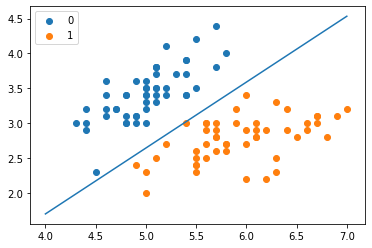

In [50]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

## scikit-learn实例¶
### sklearn.linear_model.LogisticRegression
solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：

a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。

b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(C=1,max_iter=1000)

In [19]:
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
clf.score(X_test, y_test)

1.0

In [21]:
print(clf.coef_, clf.intercept_)

[[ 2.60542823 -2.72054436]] [-5.77395485]


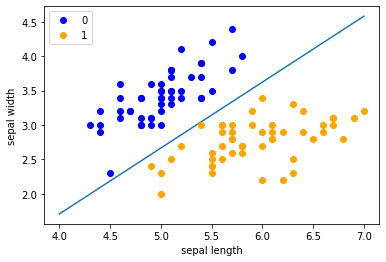

In [22]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 最大熵模型

In [60]:
import math
from copy import deepcopy

In [76]:
class MaxEntropy:
    def __init__(self, EPSILON=0.005):
        self._samples = []
        self._Y = set()  # 标签集合，相当于去重后的y
        self._numXY = {}  # key为(x,y)，value为出现次数
        self._N = 0  # 样本数
        self._Ep_ = []  # 样本分布的特征期望值
        self._xyID = {}  # key记录(x,y),value记录id号
        self._n = 0  # 特征键值(x,y)的个数
        self._C = 0  # 最大特征数
        self._IDxy = {}  # key为(x,y)，value为对应的id号
        self._w = []
        self._EPSILON = EPSILON  # 收敛条件
        self._lastw = []  # 上一次w参数值

    def loadData(self, dataset):
        self._samples = deepcopy(dataset)
        for items in self._samples:
            y = items[0]
            X = items[1:]
            self._Y.add(y)  # 集合中y若已存在则会自动忽略
            for x in X:
                if (x, y) in self._numXY:
                    self._numXY[(x, y)] += 1
                else:
                    self._numXY[(x, y)] = 1

        self._N = len(self._samples)
        self._n = len(self._numXY)
        self._C = max([len(sample) - 1 for sample in self._samples])
        self._w = [0] * self._n
        self._lastw = self._w[:]

        self._Ep_ = [0] * self._n
        for i, xy in enumerate(self._numXY):  # 计算特征函数fi关于经验分布的期望
            self._Ep_[i] = self._numXY[xy] / self._N
            self._xyID[xy] = i
            self._IDxy[i] = xy

    def _Zx(self, X):  # 计算每个Z(x)值
        zx = 0
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            zx += math.exp(ss)
        return ss

    def _model_pyx(self, y, X):  # 计算每个P(y|x)
        zx = self._Zx(X)
        ss = 0
        for x in X:
            if (x, y) in self._numXY:
                ss += self._w[self._xyID[(x, y)]]
        pyx = math.exp(ss) / zx
        return pyx

    def _model_ep(self, index):  # 计算特征函数fi关于模型的期望
        x, y = self._IDxy[index]
        ep = 0
        for sample in self._samples:
            if x not in sample:
                continue
            pyx = self._model_pyx(y, sample)
            ep += pyx / self._N
        return ep

    def _convergence(self):  # 判断是否全部收敛(上一个w与现在的w之间的差值是否小于epsilon)
        for last, now in zip(self._lastw, self._w):
            if abs(last - now) >= self._EPSILON:
                return False
        return True

    def predict(self, X):  # 计算预测概率
        Z = self._Zx(X)
        result = {}
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            pyx = math.exp(ss) / Z
            result[y] = pyx
        return result

    def train(self, maxiter=1000):  # 训练数据
        for loop in range(maxiter):  # 最大训练次数
            print("iter:%d" % loop)
            self._lastw = self._w[:]
            for i in range(self._n):
                ep = self._model_ep(i)  # 计算第i个特征的模型期望
                self._w[i] += math.log(self._Ep_[i] / ep) / self._C  # 更新参数    # 改进的迭代尺度算法IIS，Page106
            print("w:", self._w)
            if self._convergence():  # 判断是否收敛
                break

In [62]:
dataset = [['no', 'sunny', 'hot', 'high', 'FALSE'],
           ['no', 'sunny', 'hot', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'high', 'FALSE'],
           ['yes', 'rainy', 'mild', 'high', 'FALSE'],
           ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
           ['no', 'rainy', 'cool', 'normal', 'TRUE'],
           ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
           ['no', 'sunny', 'mild', 'high', 'FALSE'],
           ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
           ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
           ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
           ['yes', 'overcast', 'mild', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
           ['no', 'rainy', 'mild', 'high', 'TRUE']]

In [63]:
maxent = MaxEntropy()
x = ['overcast', 'mild', 'high', 'FALSE']

In [110]:
maxent.loadData(dataset)
maxent.train()

iter:0
w: [0.9739734058745657, 0.8774720026918307, 0.8901697068008377, 0.6621931186226032, 0.8513258884468135, 1.3620768500391671, 1.1668567856480576, 1.1005808311141598, 1.0881699880387297, 0.9731790457407923, 0.9656797884509396, 0.9922464984852097, 0.9643331705246146, 1.2932370522077057, 1.0173351632763568, 0.7493906938154503, 0.9420960039910977, 0.9913743154249052, 0.9224655531485316]
iter:1
w: [2.0256431627638327, 1.903470241177728, 1.8494208548997793, 1.3886373222249204, 1.7514387483639244, 2.4457075433246156, 2.1542510897120364, 2.108356875660954, 2.1298233308658565, 1.9446630855676226, 1.9156250063305358, 1.951094885093918, 1.9143857649946687, 2.5585610368861813, 2.0702311659242696, 1.531798373941553, 1.8669320383164536, 1.9934348445229197, 1.8286841321699763]
iter:2
w: [3.091367712412762, 2.9589899211869573, 2.825739801077553, 2.149133981455051, 2.6653089174661915, 3.4326207423909563, 3.094783877146629, 3.0913204305527997, 3.16045601976742, 2.924889713977334, 2.864537120665438,

OverflowError: math range error

In [106]:
print('predict:', maxent.predict(x))

predict: {'no': 0.5, 'yes': 0.5}
